# 1. Universe Selection

In [1]:
# Import pandas library and set the alias name to pd
import pandas as pd

# Read the csv data from cryptos_price.csv into a dataframe df.
df = pd.read_csv('cryptos_price.csv', index_col=0)

# Set index type to datetime
df.index = pd.to_datetime(df.index)

# Print the last five rows of the dataframe df
df.tail()

,BTC,XRP,EOS,XLM,LTC,ETH,XMR,DASH,NEO,ETC
2018-10-08 05:30:00,6650.07,0.4910,5.94,0.2485,59.44,229.33,114.30,182.99,18.55,10.96
2018-10-09 05:30:00,6631.79,0.4805,5.92,0.2465,58.68,227.49,113.89,181.22,18.35,10.91
2018-10-10 05:30:00,6581.07,0.4640,5.92,0.2419,57.82,225.26,114.74,179.83,18.28,10.85
2018-10-11 05:30:00,6209.47,0.3809,5.09,0.2047,50.81,189.83,100.37,157.06,15.52,9.15
2018-10-12 05:30:00,6271.32,0.4348,5.23,0.2184,52.61,196.81,102.97,158.72,16.02,9.52


# 2. Alpha Generation 

## 2.1 Alpha: 2-day returns

In [2]:
# Compute the 1-day percent change using the pct_change function
df_pct = df.pct_change()

# Add the past two days returns using the rolling_sum function
df_pct_2 = df_pct.rolling(2).sum()

# Print the last five rows of the 2-day percentage change
df_pct_2.tail()

,BTC,XRP,EOS,XLM,LTC,ETH,XMR,DASH,NEO,ETC
2018-10-08 05:30:00,0.009112,0.006985,0.036486,0.033000,0.027909,0.020894,-0.005091,0.011372,0.033152,0.002745
2018-10-09 05:30:00,0.004662,-0.002713,0.027883,0.011230,0.010454,0.008285,0.000983,0.000317,0.006772,-0.001817
2018-10-10 05:30:00,-0.010397,-0.055724,-0.003367,-0.026710,-0.027442,-0.017826,0.003876,-0.017343,-0.014596,-0.010062
2018-10-11 05:30:00,-0.064113,-0.213434,-0.140203,-0.172444,-0.135894,-0.167088,-0.117776,-0.134290,-0.154799,-0.162182
2018-10-12 05:30:00,-0.046504,-0.037588,-0.112698,-0.086855,-0.085812,-0.120515,-0.099336,-0.116050,-0.118768,-0.116245


In [3]:
# Daily rank the cryptos in ascending order
pct_2_ranks = df_pct_2.rank(axis=1, ascending=True)

# Print the last five rows of the ranks
pct_2_ranks.tail()

,BTC,XRP,EOS,XLM,LTC,ETH,XMR,DASH,NEO,ETC
2018-10-08 05:30:00,4.0,3.0,10.0,8.0,7.0,6.0,1.0,5.0,9.0,2.0
2018-10-09 05:30:00,5.0,1.0,10.0,9.0,8.0,7.0,4.0,3.0,6.0,2.0
2018-10-10 05:30:00,7.0,1.0,9.0,3.0,2.0,4.0,10.0,5.0,6.0,8.0
2018-10-11 05:30:00,10.0,1.0,6.0,2.0,7.0,3.0,9.0,8.0,5.0,4.0
2018-10-12 05:30:00,9.0,10.0,5.0,7.0,8.0,1.0,6.0,4.0,2.0,3.0


# 2.2 Alpha: 7-day standard deviation

In [4]:
# Compute the rolling standard deviation for the past 7 days
df_std_7 = df_pct.rolling(7).std()

# Daily rank the cryptos in descending order
std_7_ranks = df_std_7.rank(axis=1, ascending=False)

# Print the last five rows of the ranks
std_7_ranks.tail()

,BTC,XRP,EOS,XLM,LTC,ETH,XMR,DASH,NEO,ETC
2018-10-08 05:30:00,9.0,1.0,3.0,2.0,5.0,4.0,8.0,7.0,6.0,10.0
2018-10-09 05:30:00,9.0,1.0,5.0,3.0,2.0,4.0,8.0,7.0,6.0,10.0
2018-10-10 05:30:00,8.0,1.0,2.0,3.0,4.0,5.0,9.0,7.0,6.0,10.0
2018-10-11 05:30:00,10.0,1.0,6.0,3.0,8.0,2.0,9.0,7.0,4.0,5.0
2018-10-12 05:30:00,10.0,1.0,6.0,2.0,7.0,3.0,8.0,9.0,5.0,4.0


# 2.3 Alpha: 14-day RSI

In [5]:
# Import the talib library to compute the strategy returns
import talib as ta

# A function is defined to compute the RSI function of talib package


def calc_rsi(df, timeperiod=14):
    return ta.RSI(df.values, timeperiod=timeperiod)


# Compute the RSI
df_rsi_14 = df.apply(calc_rsi, axis=0)

# Daily rank the RSI values in ascending order
rsi_14_ranks = df_rsi_14.rank(axis=1, ascending=True)

# Print the last five rows of the rank
rsi_14_ranks.tail()

,BTC,XRP,EOS,XLM,LTC,ETH,XMR,DASH,NEO,ETC
2018-10-08 05:30:00,7.0,8.0,10.0,9.0,6.0,4.0,5.0,2.0,3.0,1.0
2018-10-09 05:30:00,8.0,7.0,10.0,9.0,6.0,4.0,5.0,2.0,3.0,1.0
2018-10-10 05:30:00,7.0,6.0,10.0,9.0,4.0,3.0,8.0,2.0,5.0,1.0
2018-10-11 05:30:00,7.0,9.0,10.0,8.0,5.0,4.0,6.0,2.0,3.0,1.0
2018-10-12 05:30:00,6.0,10.0,8.0,9.0,7.0,4.0,5.0,2.0,3.0,1.0


In [6]:
# Add individual ranks to get the combined score
combined_score = pct_2_ranks + std_7_ranks + rsi_14_ranks

# Rank the combined score
combined_ranks = combined_score.rank(axis=1)

# Print last five rows of the combined_ranks
combined_ranks.tail()

,BTC,XRP,EOS,XLM,LTC,ETH,XMR,DASH,NEO,ETC
2018-10-08 05:30:00,9.0,1.0,10.0,8.0,6.5,4.0,4.0,4.0,6.5,2.0
2018-10-09 05:30:00,9.0,1.0,10.0,8.0,6.0,4.5,7.0,2.0,4.5,3.0
2018-10-10 05:30:00,9.0,1.0,8.0,5.0,2.0,3.0,10.0,4.0,6.0,7.0
2018-10-11 05:30:00,10.0,3.0,8.0,5.0,7.0,1.0,9.0,6.0,4.0,2.0
2018-10-12 05:30:00,10.0,8.0,6.5,5.0,9.0,1.5,6.5,4.0,3.0,1.5


# 3. Portfolio Construction

In [7]:
# Generate trading signal
def signal_generator(rank):
    # If the rank is less than 6 than set the signal to 0 to indicate no positions
    rank[rank < 6] = 0

    # If the rank is greater than or equal to 6 than set the signal to 1 to indicate the long position
    rank[rank >= 6] = 1

    # return the rank dataframe
    return rank


# Call the signal_generator to decide on cryptocurrency to go long on
signal = combined_ranks.apply(lambda r: signal_generator(r), axis=0)

# Print the last five rows of the signal dataframe
signal.tail()

,BTC,XRP,EOS,XLM,LTC,ETH,XMR,DASH,NEO,ETC
2018-10-08 05:30:00,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2018-10-09 05:30:00,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-10-10 05:30:00,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2018-10-11 05:30:00,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2018-10-12 05:30:00,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


#### Note: Number of positions

In [8]:
# Number of positions
# Take the sum of signal to determine the number of positions
signal.sum(axis=1)[-25:-15]

2018-09-18 05:30:00    5.0
2018-09-19 05:30:00    5.0
2018-09-20 05:30:00    5.0
2018-09-21 05:30:00    4.0
2018-09-22 05:30:00    4.0
2018-09-23 05:30:00    4.0
2018-09-24 05:30:00    6.0
2018-09-25 05:30:00    5.0
2018-09-26 05:30:00    5.0
2018-09-27 05:30:00    4.0
dtype: float64

# 4. Strategy Returns

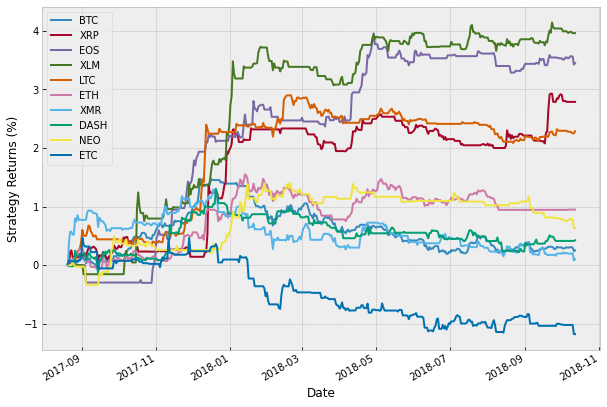

In [10]:
# Import matplotlib package to plot the graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("bmh")

# Compute the strategy returns for each of the cryptocurrencies
strategy_returns = signal.shift(1) * df_pct

# Plot the cumulative sum of the returns for each of the cryptos
strategy_returns.cumsum().plot(figsize=(10, 7))
plt.xlabel('Date')
plt.ylabel('Strategy Returns (%)')
plt.show()

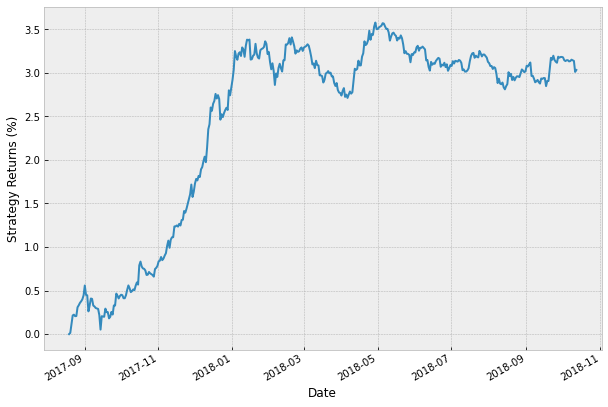

In [11]:
# Compute the strategy returns for all the cryptocurrencies in the portfolio.
# An equal weight is assumed for each of the cryptocurrency
# And therefore the strategy returns are divided by the number of positions
daily_ret = strategy_returns.sum(axis=1) / signal.sum(axis=1)

# Plot the cumulative strategy returns
daily_ret.cumsum().plot(figsize=(10, 7))
plt.xlabel('Date')
plt.ylabel('Strategy Returns (%)')
plt.show()

# Sharpe Ratio

In [12]:
import numpy as np

# The below function returns the Sharpe ratio for the excess returns ((Strategy returns) - (Risk-free rate)) passed to it.
def annualized_sharpe_ratio(returns, N=252):
    return np.sqrt(N) * returns.mean() / returns.std()

# Sharpe ratio
excess_daily_strategy_return = daily_ret - 0.05/252
sharpe = annualized_sharpe_ratio(excess_daily_strategy_return)
print('Sharpe', sharpe)

Sharpe 1.7680565686369711
